<div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Optimizers Performance Comparison</div>


### <div style="text-align: left; background-color: #AA4EB8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">IMPORTING LIBRARIES📚</div>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout,Flatten
import matplotlib.pyplot as plt
import os, gc

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">LOADING DATA👓</div>

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">DATA RESHAPE </div>

In [3]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /=255
y_train=tf.keras.utils.to_categorical(y_train)#,num_classes=)
y_test=tf.keras.utils.to_categorical(y_test)#, num_classes)

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">BUILD OPTIMIZER CALL</div>

In [4]:
def build_optimizer(op):
    model=tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'))
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])
    return model

### <div style="text-align: left; background-color: #AA4EB8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">COMPARING EACH OPTIMIZER ACCURACY</div>

In [5]:
optimizers=['Adam', 'RMSprop','Adadelta', 'Adagrad',  'SGD']
opt_res=[]
model_res=[]
for i in optimizers:
    model=build_optimizer(i)
    print("Accuracy for: ",i)
    print("\n")
    history=model.fit(X_train,y_train, epochs=5, batch_size=64,verbose=1, validation_data=(X_test, y_test))
    print("\n")
    gc.collect()
    model_res.append(history)
    opt_res.append(history.history['accuracy'])
    

Accuracy for:  Adam


Epoch 1/5
938/938 [==============================] - 35s 36ms/step - loss: 0.0428 - accuracy: 0.9271 - val_loss: 0.0083 - val_accuracy: 0.9862
Epoch 2/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0106 - accuracy: 0.9849 - val_loss: 0.0065 - val_accuracy: 0.9896
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0072 - accuracy: 0.9896 - val_loss: 0.0073 - val_accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0053 - accuracy: 0.9919 - val_loss: 0.0057 - val_accuracy: 0.9904
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0046 - accuracy: 0.9928 - val_loss: 0.0053 - val_accuracy: 0.9910


Accuracy for:  RMSprop


Epoch 1/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0357 - accuracy: 0.9398 - val_loss: 0.0082 - val_accuracy: 0.9859
Epoch 2/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0095 - accuracy:

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">CONCLUSION</div>

The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications. Choosing the Adam optimizer for your application might give you the best probability of getting the best results

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">PLOTTING OPTIMIZERS ACCURACY</div>

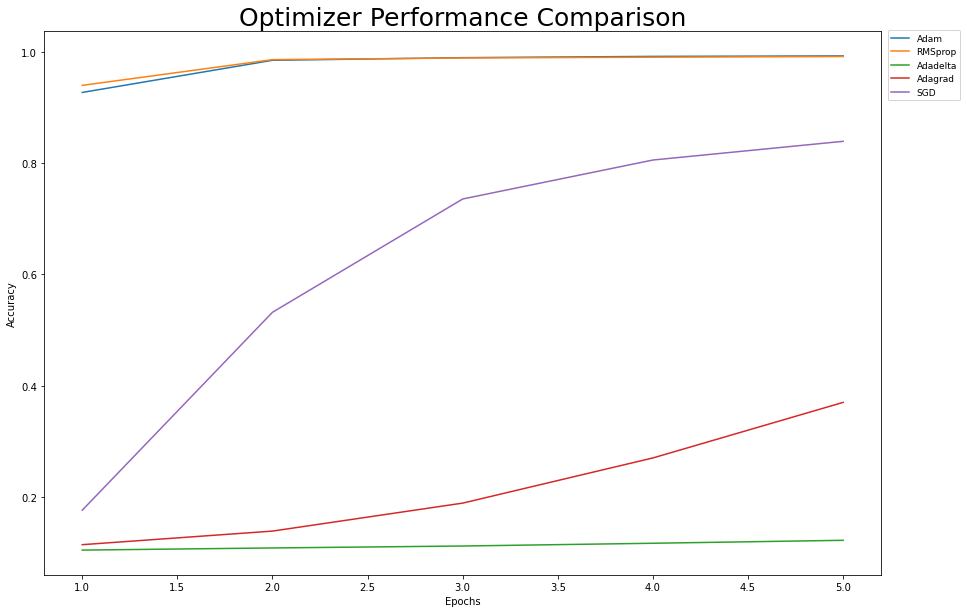

In [6]:
fully_nested = [list(zip(*[(ix+1,y) for ix,y in enumerate(x)])) for x in opt_res]
names = ['sublist%d'%(i+1) for i in range(len(fully_nested))]

fig = plt.figure(figsize=(15,10))

for l in fully_nested:
    plt.plot(*l)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(optimizers, fontsize=9, loc = 'upper right', bbox_to_anchor=(1.1, 1.01))
plt.title("Optimizer Performance Comparison", fontsize=25)
plt.show()

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">MODEL EVALUATION</div>

In [7]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
for y in optimizers:
    print(y)
    model.evaluate(X_test, y_test, batch_size=64)

# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions:", predictions[:4])

Evaluate on test data
Adam
157/157 [==============================] - 1s 9ms/step - loss: 0.0644 - accuracy: 0.9060
RMSprop
157/157 [==============================] - 1s 9ms/step - loss: 0.0644 - accuracy: 0.9060
Adadelta
157/157 [==============================] - 1s 9ms/step - loss: 0.0644 - accuracy: 0.9060
Adagrad
157/157 [==============================] - 1s 9ms/step - loss: 0.0644 - accuracy: 0.9060
SGD
157/157 [==============================] - 1s 9ms/step - loss: 0.0644 - accuracy: 0.9060
Generate predictions for 3 samples
predictions: [[1.1989533e-05 6.5919958e-06 7.8039557e-06 7.4425865e-05 1.9430565e-06
  8.4110206e-06 1.8467145e-07 9.9978894e-01 7.4729442e-06 9.2326656e-05]
 [2.0681680e-03 1.1290683e-03 9.5720768e-01 7.9159755e-03 7.2585908e-06
  2.1265347e-02 6.7445696e-03 8.1711033e-07 3.6595962e-03 1.5933275e-06]
 [3.8362199e-05 9.9346584e-01 1.6135601e-03 7.9860800e-04 1.8560418e-04
  2.9107608e-04 1.0517610e-03 1.0460563e-03 1.0337657e-03 4.7528741e-04]]


### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">BUILD OPTIMIZER MODEL FOR LEARNING RATE 1</div>

In [8]:
def build_optimizer_learning_rate(op):
    modell=tf.keras.Sequential()
    modell.add(tf.keras.Input(shape=(28,28,1)))
    modell.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'))
    modell.add(tf.keras.layers.MaxPool2D())
    modell.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'))
    modell.add(tf.keras.layers.Dropout(0.25))
    modell.add(tf.keras.layers.Flatten())
    modell.add(tf.keras.layers.Dense(128, activation='relu'))
    modell.add(tf.keras.layers.Dense(256, activation='relu'))
    modell.add(tf.keras.layers.Dropout(0.5))
    modell.add(tf.keras.layers.Dense(10, activation='softmax'))
    modell.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])
    return modell

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">CHANGED LEARNING TO 1 FOR EACH OPTIMIZER</div>

In [9]:
optl_res=[]
optimizers=[tf.keras.optimizers.Adam(learning_rate=1), tf.keras.optimizers.RMSprop(learning_rate=1),tf.keras.optimizers.Adadelta(learning_rate=1), tf.keras.optimizers.Adagrad(learning_rate=1), tf.keras.optimizers.SGD(learning_rate=1)]
for i in optimizers:
    modell=build_optimizer_learning_rate(i)
    print("Checking Accuracy when tuning learning_rate to 1:",i)
    print("\n")
    hist=modell.fit(X_train,y_train, epochs=5, batch_size=64,verbose=1, validation_data=(X_test, y_test))
    print("\n")
    gc.collect()
    optl_res.append(hist.history['accuracy'])

Checking Accuracy when tuning learning_rate to 1: <keras.optimizer_v2.adam.Adam object at 0x7f82e42b7c90>


Epoch 1/5
938/938 [==============================] - 35s 36ms/step - loss: 205915.3438 - accuracy: 0.1019 - val_loss: 0.3286 - val_accuracy: 0.0974
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 0.3310 - accuracy: 0.1020 - val_loss: 0.3351 - val_accuracy: 0.1028
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.3319 - accuracy: 0.0987 - val_loss: 0.3334 - val_accuracy: 0.0980
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.3319 - accuracy: 0.1024 - val_loss: 0.3335 - val_accuracy: 0.0982
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.3320 - accuracy: 0.1023 - val_loss: 0.3339 - val_accuracy: 0.0982


Checking Accuracy when tuning learning_rate to 1: <keras.optimizer_v2.rmsprop.RMSprop object at 0x7f82e42e3550>


Epoch 1/5
938/938 [==============================] - 37s

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">Conclusion</div>

The results of the learning rate changed to 1 optimization algorithms accuracy dropped drastically. 

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">PLOTTING OPTIMIZERS ACCURACY WHEN LEARNING RATE 1 </div>

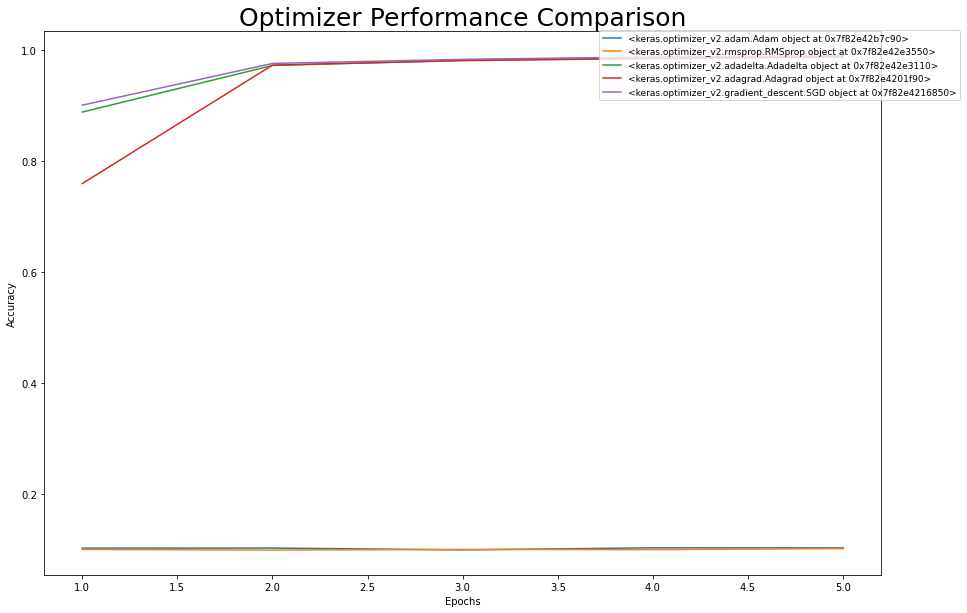

In [10]:
fully_nested = [list(zip(*[(ix+1,y) for ix,y in enumerate(x)])) for x in optl_res]
names = ['sublist%d'%(i+1) for i in range(len(fully_nested))]

fig = plt.figure(figsize=(15,10))

for l in fully_nested:
    plt.plot(*l)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(optimizers, fontsize=9, loc = 'upper right', bbox_to_anchor=(1.1, 1.01))
plt.title("Optimizer Performance Comparison", fontsize=25)
plt.show()

### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px">MODEL EVALUATION</div>

In [11]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
for y in optimizers:
    print(y)
    modell.evaluate(X_test, y_test, batch_size=64)

# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = modell.predict(X_test[:3])
print("predictions:", predictions[:4])

Evaluate on test data
157/157 [==============================] - 1s 9ms/step - loss: 0.0102 - accuracy: 0.9835
Generate predictions for 3 samples
predictions: [[3.9560230e-17 8.2162813e-14 4.1111015e-14 5.5180449e-14 9.1642062e-15
  2.6944632e-16 6.5981273e-18 1.0000000e+00 2.8252399e-15 5.3988389e-15]
 [1.0989338e-13 2.7971479e-12 1.0000000e+00 3.0085409e-16 1.8373503e-14
  6.1829525e-16 2.8546898e-12 6.0649592e-16 2.5678402e-16 7.5431028e-15]
 [9.5299989e-14 1.0000000e+00 1.1701374e-12 2.0753272e-13 1.2168997e-11
  1.8904875e-12 1.2696884e-11 3.1148976e-11 4.0301042e-13 3.1929934e-12]]
